In [9]:
import random
import autograd.numpy as np
from autograd import grad, jacobian
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
import math
from scipy.optimize import least_squares 

In [10]:
def f(x):
  return 1 / (x ** 2 - 3 * x + 2)

In [11]:
xk = [3 * i / 1000 for i in range(1000)]
yk = []
for i in xk:
    if (f(i)<-100):
        yk.append(-100 + np.random.normal(0, 1))
    elif ((f(i)>=-100) & (f(i)<=100)):
        yk.append(f(i) + np.random.normal(0, 1))
    else:
        yk.append(100 + np.random.normal(0, 1))

In [53]:
def approximation_function(a, b, c, d):
    x = []
    y = []
    for k in range(1000):
        x.append(3 * k / 1000)
        y.append((a * x[k] + b) / (x[k] ** 2 + c * x[k] + d))
    return x, y

In [14]:
def approximant_function(x,xk,yk):
    a = x[0]
    b = x[1]
    c = x[2]
    d = x[3]
    d_func = 0
    for k in range(1000):
        d_func += ((a * xk[k] + b) / (xk[k] ** 2 + c * xk[k] + d) - yk[k]) ** 2
    return d_func

In [15]:
def approximant_function_2(x,xk,yk):
    a = x[0]
    b = x[1]
    c = x[2]
    d = x[3]
    return [((a * xk[k] + b) / (xk[k] ** 2 + c * xk[k] + d) - yk[k]) for k in range(1000)]

In [27]:
res_nelder_mead = scipy.optimize.minimize(approximant_function, [2,2,2,2], args = (xk,yk),  method="Nelder-Mead",tol=0.001)
print(res_nelder_mead)

 final_simplex: (array([[-1.60364375,  1.60455549, -2.00102033,  1.00107064],
       [-1.60364249,  1.6045544 , -2.001021  ,  1.00107133],
       [-1.60363989,  1.60455234, -2.0010219 ,  1.00107222],
       [-1.60363708,  1.60455017, -2.00102269,  1.001073  ],
       [-1.60363946,  1.60455171, -2.00102294,  1.00107325]]), array([152091.75786671, 152091.7580839 , 152091.75821776, 152091.75847058,
       152091.75872546]))
           fun: 152091.75786670606
       message: 'Optimization terminated successfully.'
          nfev: 410
           nit: 235
        status: 0
       success: True
             x: array([-1.60364375,  1.60455549, -2.00102033,  1.00107064])


In [17]:
res_lm = least_squares(approximant_function_2, [2,2,2,2],  args = (xk, yk), method='lm')
print(res_lm)

 active_mask: array([0, 0, 0, 0])
        cost: 68461.64312063713
         fun: array([ 4.44317985e-01,  6.38394279e-01,  7.73185869e-01,  1.23608911e+00,
       -1.07267822e+00, -6.87465713e-01,  1.89752712e+00,  3.95692682e-01,
        1.00704118e+00,  4.70018791e-01, -3.55811157e-02,  2.94393307e+00,
       -4.78434377e-01,  1.05974308e+00, -8.11240693e-01,  1.21210717e+00,
        2.70988036e+00, -6.98502995e-02,  1.01310350e+00,  9.71428387e-01,
        1.48093937e+00,  8.08992304e-01,  2.30086964e+00, -3.74785344e-01,
        1.63668330e-01,  1.46193322e+00,  1.15300678e+00, -4.67466070e-01,
        8.59785552e-01,  9.76960682e-01,  3.67058870e-01,  5.78020332e-01,
        5.35280887e-01, -7.73908411e-02,  2.10399486e+00,  2.83265338e+00,
       -1.03908972e-01, -4.26726477e-01,  3.63445750e-01, -6.66361014e-02,
        8.82307190e-01,  8.07352050e-02,  3.93268234e-01,  2.47995907e+00,
        3.51010836e-01,  1.49681592e+00, -5.86496853e-01, -3.05407320e-01,
        6.14900386e-

In [62]:
res_dif_evoluation = scipy.optimize.differential_evolution(approximant_function, [(-2,2),(-2,2),(-2,2),(-2,2)], maxiter=1000, args = (xk,yk))
print(res_dif_evoluation)

     fun: 137390.56180447002
     jac: array([-9.90508124e+02, -1.00974576e+03,  1.64043065e+06,  5.76810134e+05])
 message: 'Optimization terminated successfully.'
    nfev: 1095
     nit: 5
 success: True
       x: array([-1.00944979,  1.00971041, -2.        ,  1.00001622])


In [63]:
res_dual_anneling = scipy.optimize.dual_annealing(approximant_function, [(-2,2),(-2,2),(-2,2),(-2,2)], maxiter=1000, args= (xk,yk))
print(res_dual_anneling)

     fun: 137390.56335601676
 message: ['Maximum number of iteration reached']
    nfev: 9106
    nhev: 0
     nit: 1000
    njev: 0
  status: 0
 success: True
       x: array([-1.00944105,  1.00970168, -2.        ,  1.00001621])


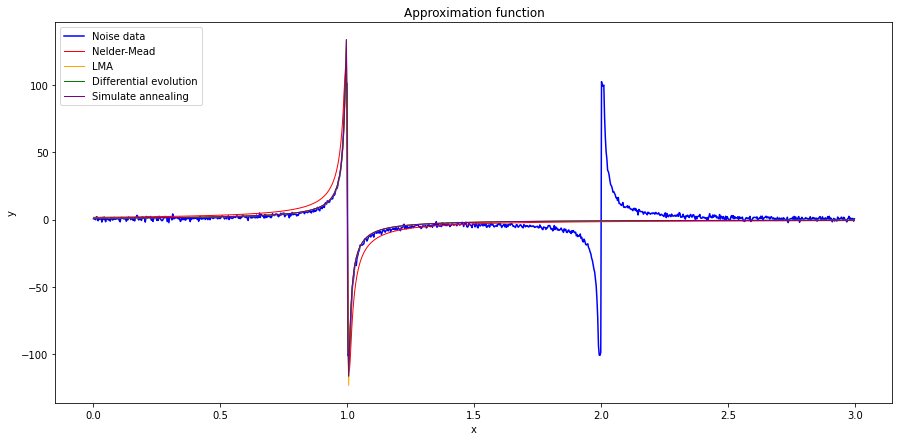

In [61]:
plt.figure(figsize=(15,7)) 
plt.title('Approximation function')   
plt.xlabel('x') 
plt.ylabel('y') 
plt.plot(xk, yk, label = "Noise data", color='blue') # noise data 
plt.plot(approximation_function(*res_nelder_mead.x)[0],
         approximation_function(*res_nelder_mead.x)[1],
         linewidth = 1, label = "Nelder-Mead", color='red') #drew approx function
plt.plot(approximation_function(*res_lm.x)[0],
         approximation_function(*res_lm.x)[1],
         linewidth = 1, label = "LMA", color='orange') #drew approx function        
plt.plot(approximation_function(*res_dif_evoluation.x)[0],
         approximation_function(*res_dif_evoluation.x)[1],
         linewidth = 1, label = "Differential evolution", color='green') #drew approx function
plt.plot(approximation_function(*res_dual_anneling.x)[0],
         approximation_function(*res_dual_anneling.x)[1],
         linewidth = 1, label = "Simulate annealing", color='purple') #drew approx function
plt.legend(loc='upper left') #show legend
plt.show() # show plot